In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import scipy.stats as st
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind

In [5]:
coral = pd.read_csv("data/coral_clean.csv")

coral

,date,latitude,longitude,ocean,realm,ecoregion,distance_to_shore,exposure,depth_m,turbidity,...,sst,sst_maximum,ssta,ssta_maximum,ssta_frequency,tsa,ssta_dhw,tsa_maximum,tsa_frequency,tsa_dhw
0,2005-09-15,23.1630,-82.5260,Atlantic,Tropical Atlantic,Cuba and Cayman Islands,8519.23,Exposed,10.00,0.0287,...,302.05,304.69,-0.46,2.24,0.0,-0.80,0.00,1.83,0.00,0.00
1,1991-03-15,-17.5750,-149.7833,Pacific,Eastern Indo-Pacific,Society Islands French Polynesia,1431.62,Exposed,14.00,0.0262,...,303.30,305.01,1.29,3.10,0.5,1.29,0.26,3.00,0.25,0.26
2,2006-01-15,18.3690,-64.5640,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,182.33,Exposed,7.00,0.0429,...,299.18,304.14,0.04,2.83,16.0,-2.64,0.00,2.31,7.00,0.00
3,2006-04-15,17.7600,-64.5680,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,313.13,Exposed,9.02,0.0424,...,299.61,304.07,-0.07,2.47,22.0,-2.27,0.00,2.19,3.00,0.00
4,2006-04-15,17.7690,-64.5830,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,792.00,Exposed,12.50,0.0424,...,299.70,303.76,0.00,2.30,16.0,-2.19,0.00,1.87,3.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23198,2014-05-27,10.1167,99.8444,Pacific,Central Indo-Pacific,Gulf of Thailand,73.88,Exposed,5.00,0.0565,...,304.79,306.89,1.40,3.74,2.0,1.26,1.37,3.35,1.00,1.33
23199,2005-10-23,18.3350,-64.8486,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,49.16,Sheltered,3.00,0.0586,...,302.11,303.67,0.32,2.34,12.0,0.21,10.14,1.76,5.00,6.22
23200,2016-04-18,-13.5002,47.8825,Indian,Western Indo-Pacific,North Madagascar,8768.03,Sometimes,14.00,0.0628,...,303.45,305.32,0.63,2.50,9.0,0.59,5.81,2.46,4.00,4.44
23201,2015-09-10,24.5019,-81.6328,Atlantic,Tropical Atlantic,Bahamas and Florida Keys,8170.00,Exposed,4.00,0.1203,...,303.76,306.04,3.91,6.20,25.0,3.91,51.11,6.19,25.00,50.63


In [6]:
coral.columns

Index(['date', 'latitude', 'longitude', 'ocean', 'realm', 'ecoregion',
       'distance_to_shore', 'exposure', 'depth_m', 'turbidity',
       'bleaching_level', 'percent_bleaching', 'cyclone_frequency',
       'windspeed', 'sst', 'sst_maximum', 'ssta', 'ssta_maximum',
       'ssta_frequency', 'tsa', 'ssta_dhw', 'tsa_maximum', 'tsa_frequency',
       'tsa_dhw'],
      dtype='object')

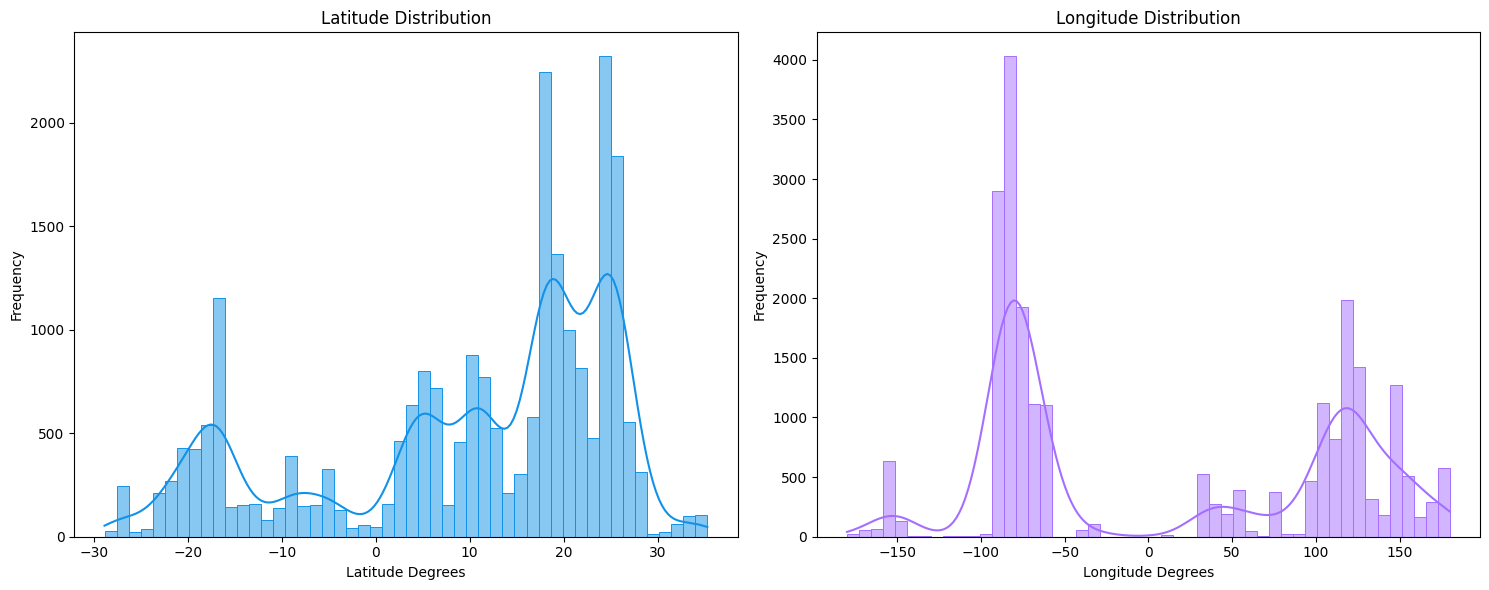

In [7]:
# Set up the figure and axes for the plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Define custom colors
color_latitude = '#1192e8' 
color_longitude = '#a56eff'

# Plotting Latitude Distribution
sns.histplot(coral['latitude'], bins=50, kde=True, color=color_latitude, edgecolor=color_latitude, ax=axes[0])
axes[0].set_title('Latitude Distribution')
axes[0].set_xlabel('Latitude Degrees')
axes[0].set_ylabel('Frequency')

# Plotting Longitude Distribution
sns.histplot(coral['longitude'], bins=50, kde=True, color=color_longitude, edgecolor=color_longitude, ax=axes[1])
axes[1].set_title('Longitude Distribution')
axes[1].set_xlabel('Longitude Degrees')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

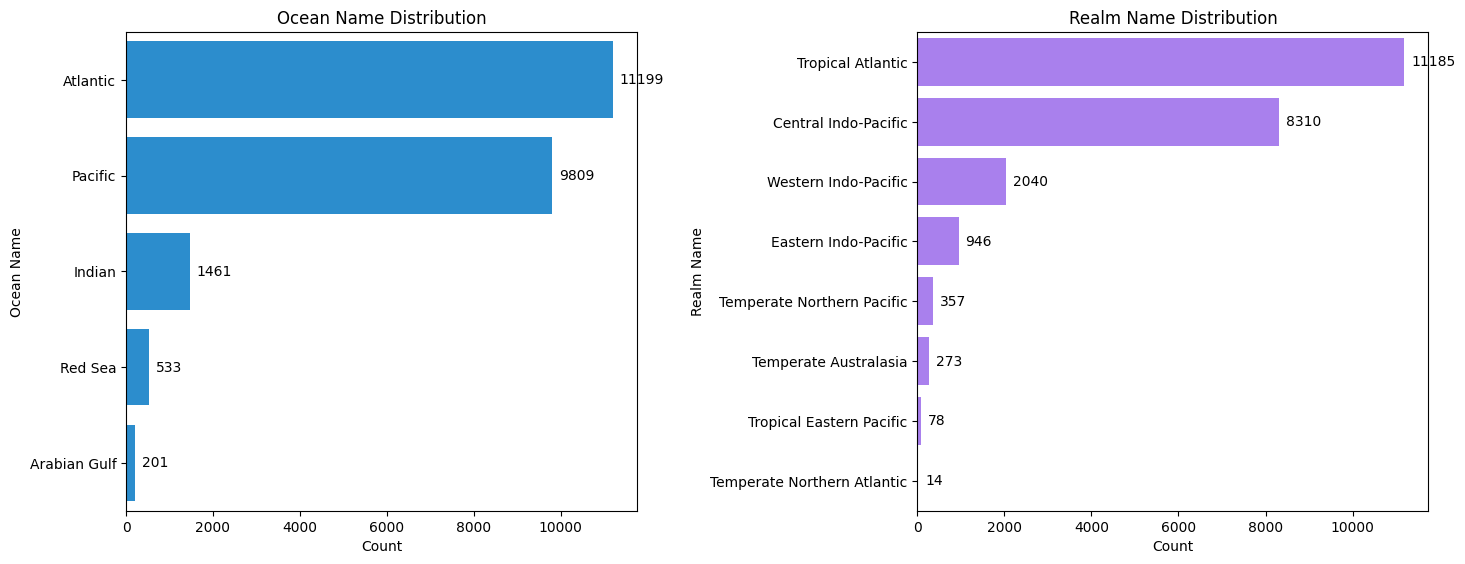

In [8]:
# Set up the figure and axes for the plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Define colors for the subplots
color1 = '#1192e8'
color2 = '#a56eff'

# Plot Ocean Name Distribution
sns.countplot(y=coral['ocean'], ax=axes[0], 
              order=coral['ocean'].value_counts().index, color=color1)
axes[0].set_title('Ocean Name Distribution')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Ocean Name')

# Add labels on the bars for Ocean Name
axes[0].bar_label(axes[0].containers[0], fmt='%d', label_type='edge', padding=5)

# Plot Realm Name Distribution
sns.countplot(y=coral['realm'], ax=axes[1], 
              order=coral['realm'].value_counts().index, color=color2)
axes[1].set_title('Realm Name Distribution')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Realm Name')

# Add labels on the bars for Realm Name
axes[1].bar_label(axes[1].containers[0], fmt='%d', label_type='edge', padding=5)

# Adjust layout for better spacing and display
plt.tight_layout(pad=2)

# Show the plots
plt.show()

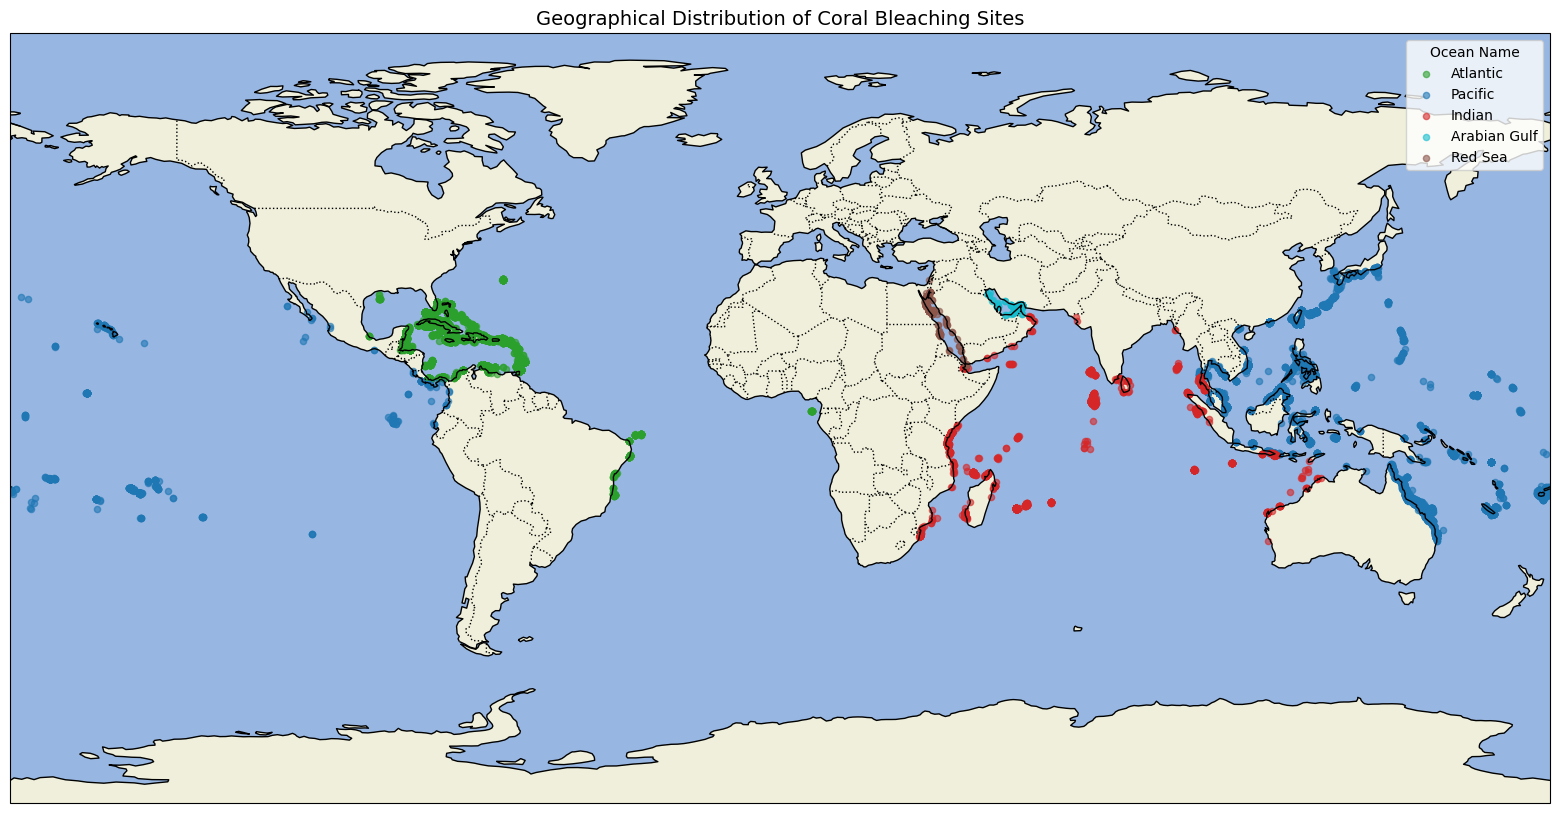

In [9]:
# Create a figure with a specific PlateCarree projection
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the map to display the whole globe
ax.set_global()

# Add basic geographic features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Define ocean colors, with a default color for any unlisted ocean
ocean_colors = {
    'Pacific': 'tab:blue',
    'Atlantic': 'tab:green',
    'Indian': 'tab:red',
    'Southern': 'tab:purple',
    'Arctic': 'tab:orange',
    'Arabian Gulf': 'tab:cyan',  
    'Red Sea': 'tab:brown'
}
default_color = 'gray'

# Plot each ocean's coral bleaching sites on the map
for ocean in coral['ocean'].unique():
    subset = coral[coral['ocean'] == ocean]
    ax.scatter(subset['longitude'], subset['latitude'],
               color=ocean_colors.get(ocean, default_color), label=ocean, s=20, alpha=0.6,
               transform=ccrs.PlateCarree())

# Add a legend for ocean names
plt.legend(title='Ocean Name', loc='upper right', bbox_to_anchor=(1, 1))

# Set the map title
plt.title('Geographical Distribution of Coral Bleaching Sites', fontsize=14)

# Display the map
plt.show()